In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

In [13]:
!pip install yfinance
import yfinance as yf

In [15]:
# Get the data for tatamotors
ticker = "M&M.NS"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [16]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,801.500000,809.799988,779.750000,807.599976,768.603455,5678798
2021-04-05,808.299988,808.799988,769.250000,774.450012,737.054199,4176802
2021-04-06,784.000000,791.599976,775.000000,781.099976,743.383057,2984229
2021-04-07,781.299988,798.599976,775.400024,796.299988,757.849121,2271095
2021-04-08,802.000000,811.000000,793.000000,795.150024,756.754639,3324494


In [17]:
 # Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


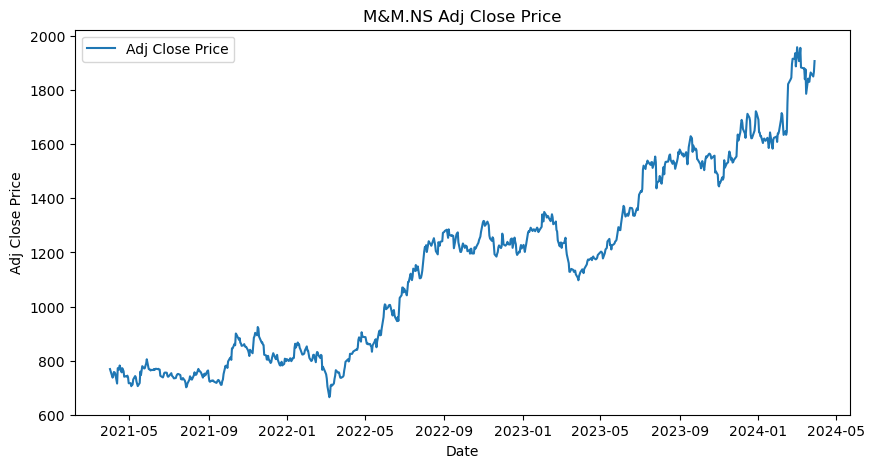

In [18]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('M&M.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
df.columns

Index(['Adj Close'], dtype='object')

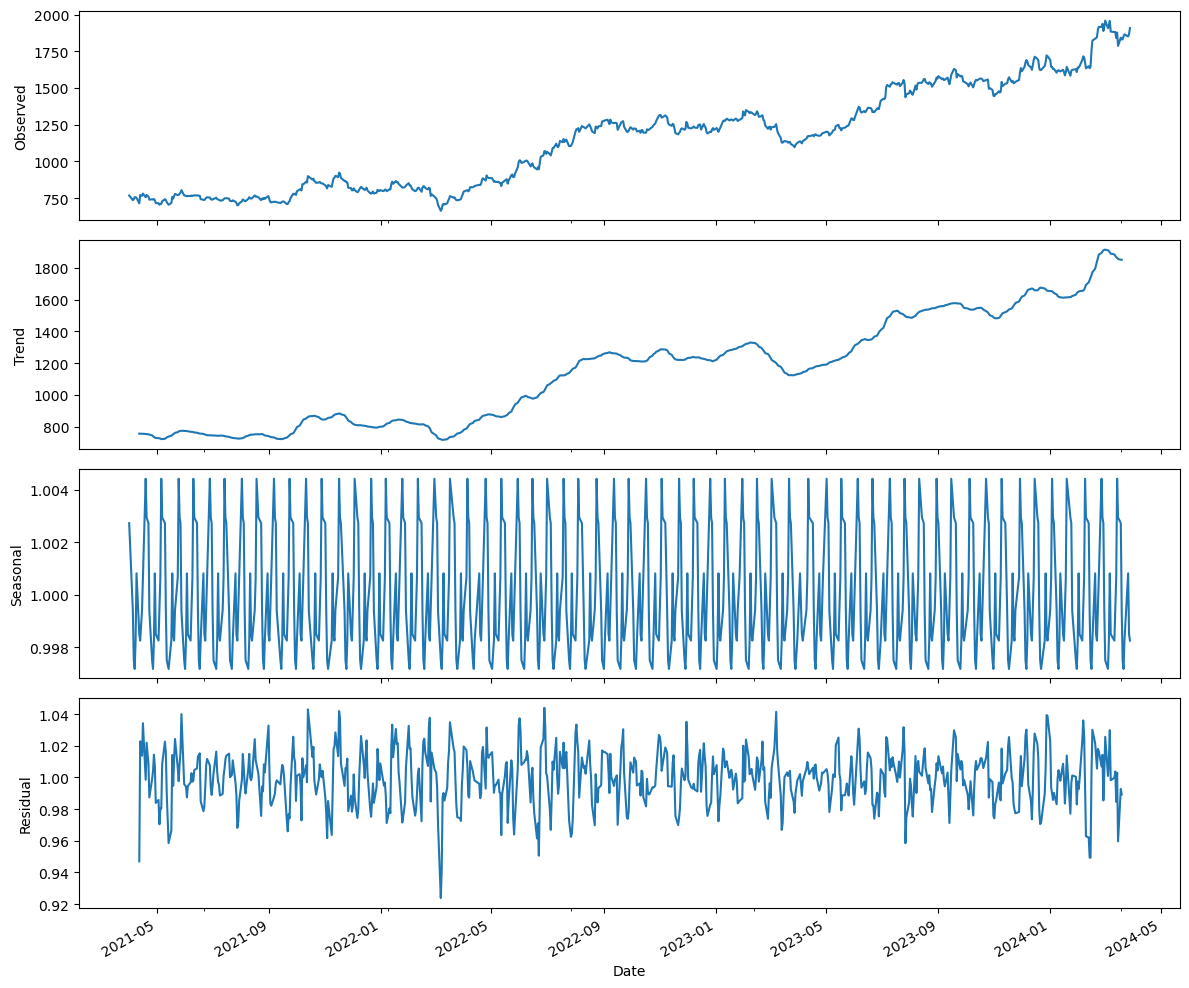

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()


In [23]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

In [24]:
monthly_data = df.resample("M").mean()

In [25]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [26]:
len(monthly_data), len(train_data)

(36, 28)

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

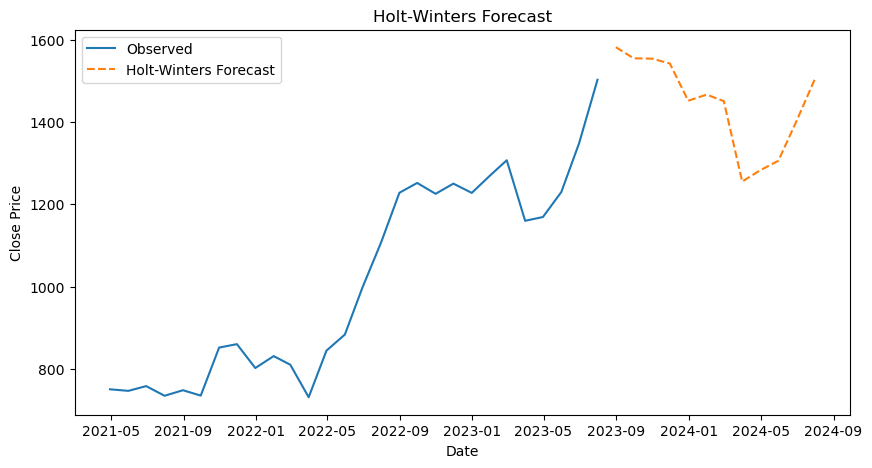

In [29]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [30]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [31]:
len(test_data), len(y_pred)

(8, 8)

In [32]:
y_pred, test_data

(2023-08-31    1581.843693
 2023-09-30    1554.917084
 2023-10-31    1554.066002
 2023-11-30    1542.349943
 2023-12-31    1451.792877
 2024-01-31    1466.703673
 2024-02-29    1450.783505
 2024-03-31    1255.440435
 Freq: M, dtype: float64,
               Adj Close
 Date                   
 2023-08-31  1523.919029
 2023-09-30  1570.694257
 2023-10-31  1531.094220
 2023-11-30  1526.358887
 2023-12-31  1665.480237
 2024-01-31  1622.760905
 2024-02-29  1771.687145
 2024-03-31  1874.615614)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 264.75479203513174
MAE: 177.81101093346302
MAPE: nan
R-squared: -3.8239185285379493


In [34]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [35]:
holt_winters_forecast

2023-08-31    1581.843693
2023-09-30    1554.917084
2023-10-31    1554.066002
2023-11-30    1542.349943
2023-12-31    1451.792877
2024-01-31    1466.703673
2024-02-29    1450.783505
2024-03-31    1255.440435
2024-04-30    1282.625923
2024-05-31    1306.051998
2024-06-30    1400.551710
2024-07-31    1502.809359
2024-08-31    1581.843693
2024-09-30    1554.917084
2024-10-31    1554.066002
2024-11-30    1542.349943
2024-12-31    1451.792877
2025-01-31    1466.703673
2025-02-28    1450.783505
2025-03-31    1255.440435
Freq: M, dtype: float64

In [36]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [40]:
!pip install pmdarima
from pmdarima import auto_arima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   --------- ------------------------------ 153.6/614.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/614.7 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------ --------------------------- 0.9/2.8 MB 27.7 MB/s eta 0:00:01
   ---------------------------------- ----- 2.4/2.8 MB 25.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 25.3 MB/s eta 0:00:00


In [47]:
import pandas as pd
import yfinance as yf
from pmdarima import auto_arima

In [51]:
try:
    arima_model = auto_arima(data['Adj Close'], 
                             seasonal=True, 
                             m=12,  # Monthly seasonality
                             stepwise=True, 
                             suppress_warnings=True)
    
    # Print the model summary
    print(arima_model.summary())
except ValueError as e:
    print(f"Error fitting ARIMA model: {e}")

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  740
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3258.468
Date:                Mon, 22 Jul 2024   AIC                           6520.936
Time:                        20:05:10   BIC                           6530.147
Sample:                             0   HQIC                          6524.488
                                - 740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5410      0.732      2.105      0.035       0.106       2.976
sigma2       395.7215     12.794     30.931      0.000     370.646     420.797
Ljung-Box (L1) (Q):                   0.19   Jarque-

C:\Users\jyoth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jyoth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


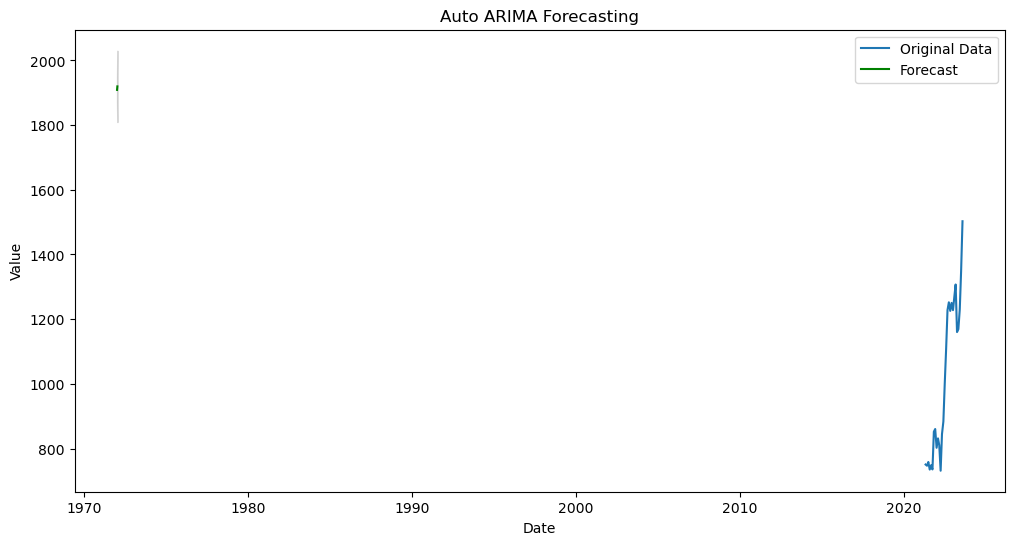

In [52]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [53]:
len(forecast)

8

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 302.2496724408302
MAE: 278.49213438560014
MAPE: nan
R-squared: -5.2870075666050065


In [55]:
daily_data= df.copy()

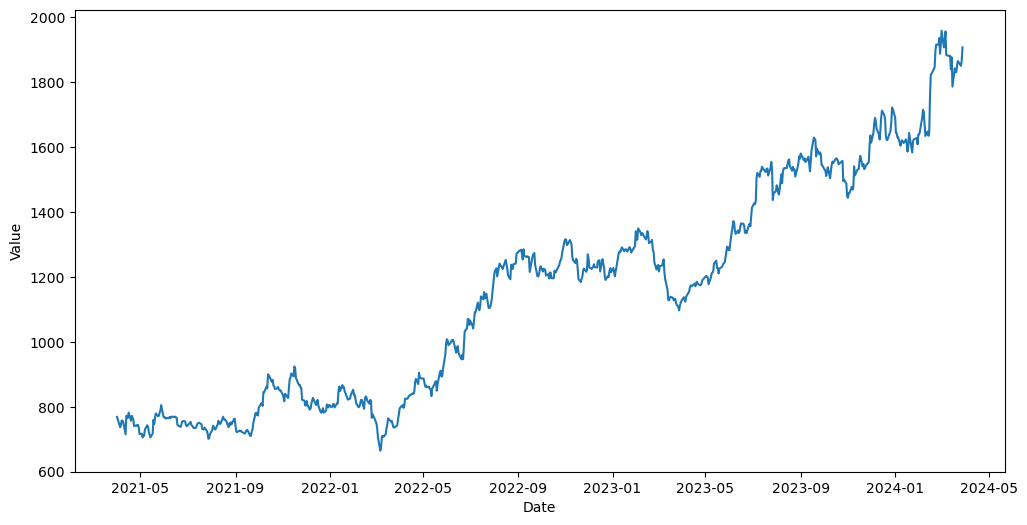

In [56]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [57]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [58]:
# Print the model summary
print(arima_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  740
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 7)   Log Likelihood               -3256.859
Date:                           Mon, 22 Jul 2024   AIC                           6519.718
Time:                                   20:06:40   BIC                           6533.533
Sample:                                        0   HQIC                          6525.045
                                           - 740                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6394      0.742      2.210      0.027       0.185       3.093
ar.S.L7       -0.0666      0.034     -1.957

In [59]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [60]:
fitted_values

Date
2021-04-01       1.537078
2021-04-05     770.140532
2021-04-06     738.591277
2021-04-07     744.920134
2021-04-08     759.386199
                 ...     
2024-03-21    1832.579947
2024-03-22    1856.666886
2024-03-26    1864.346727
2024-03-27    1858.059639
2024-03-28    1865.377327
Name: predicted_mean, Length: 740, dtype: float64

In [61]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\jyoth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jyoth\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [72]:
len("forecast")

8

In [65]:
import matplotlib.pyplot as plt

In [71]:
len('future_dates')

12

In [73]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

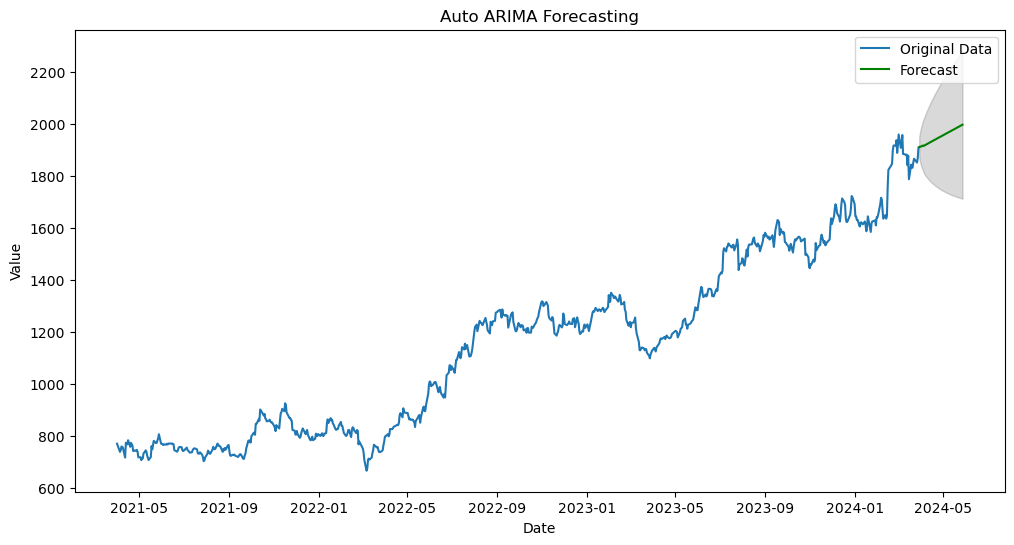

In [74]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [82]:
!pip install tensorflow

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [84]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,801.500000,809.799988,779.750000,807.599976,768.603455,5678798
2021-04-05,808.299988,808.799988,769.250000,774.450012,737.054199,4176802
2021-04-06,784.000000,791.599976,775.000000,781.099976,743.383057,2984229
2021-04-07,781.299988,798.599976,775.400024,796.299988,757.849121,2271095
2021-04-08,802.000000,811.000000,793.000000,795.150024,756.754639,3324494


In [86]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [87]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (710, 30, 6)
Shape of y: (710,)


In [88]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\jyoth\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0050 - val_loss: 0.0187
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0104 - val_loss: 0.0033
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0084 - val_loss: 0.0217
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0045 - val_loss: 0.0248
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0016 - val_loss: 0.0036
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0025 - val_loss: 0.0093
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0016 - val_loss: 0.0092
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0015 - val_loss: 0.0072
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0012 - val_loss: 0.0054
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0012 - val_loss: 0.0058
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0013 - val_loss: 0.0048
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0

In [91]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step


In [92]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 1508.6671668352574, True Value: 1571.6918945312498
Prediction: 1513.8688092278935, True Value: 1563.94873046875
Prediction: 1519.8710484093608, True Value: 1580.3782958984375
Prediction: 1526.8887651748119, True Value: 1564.94140625
Prediction: 1533.0316872602125, True Value: 1559.7296142578125
Prediction: 1537.076243619511, True Value: 1565.5369873046875
Prediction: 1540.0007357622962, True Value: 1554.3687744140623
Prediction: 1541.4101871803214, True Value: 1556.1557617187498
Prediction: 1541.9487003575487, True Value: 1570.5999755859375
Prediction: 1543.2642089153815, True Value: 1546.62548828125


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 57.2404755561504
MAE: 44.74677978300301
MAPE: 2.7611974926412
R-squared: 0.8039812006160729


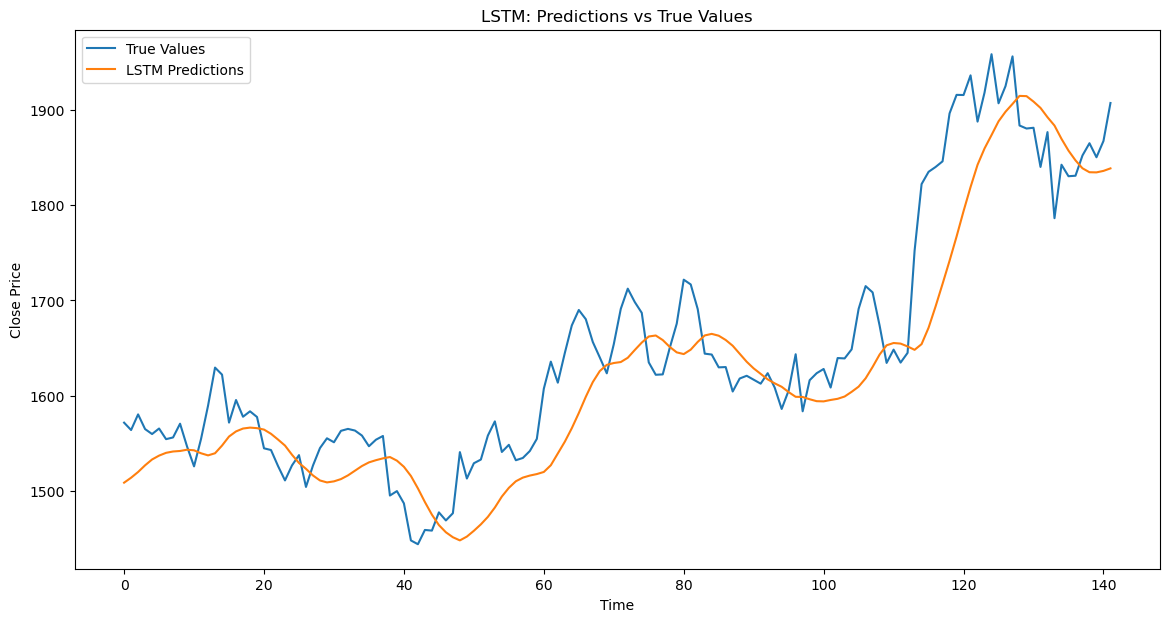

In [94]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [95]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [96]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [97]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [98]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.0004961216522098414


In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.02227378845661064
MAE: 0.016264574388787652
MAPE: inf
R-squared: 0.9930069385523713


C:\Users\jyoth\AppData\Local\Temp\ipykernel_22656\1497539800.py:12: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100


In [100]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.0002452570396213098


In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.015660684519563945
MAE: 0.011547274341202642
MAPE: 1081769.0827201074
R-squared: 0.9965429899281842


In [102]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.34137896049143723, True Value: 0.36936735858531955
Prediction: 0.20062818737928345, True Value: 0.22892808022867228
Prediction: 0.908475916630155, True Value: 0.9103171506210628
Prediction: 0.46971225271035577, True Value: 0.44134811760521286
Prediction: 0.1440655225727807, True Value: 0.16567167424516172
Prediction: 0.11104273907092777, True Value: 0.14131357678003764
Prediction: 0.46971225271035577, True Value: 0.44491719470389113
Prediction: 0.061984248949778276, True Value: 0.047302912471247294
Prediction: 0.06277298536734055, True Value: 0.056302394052280325
Prediction: 0.9085142167121465, True Value: 0.9670113658323365


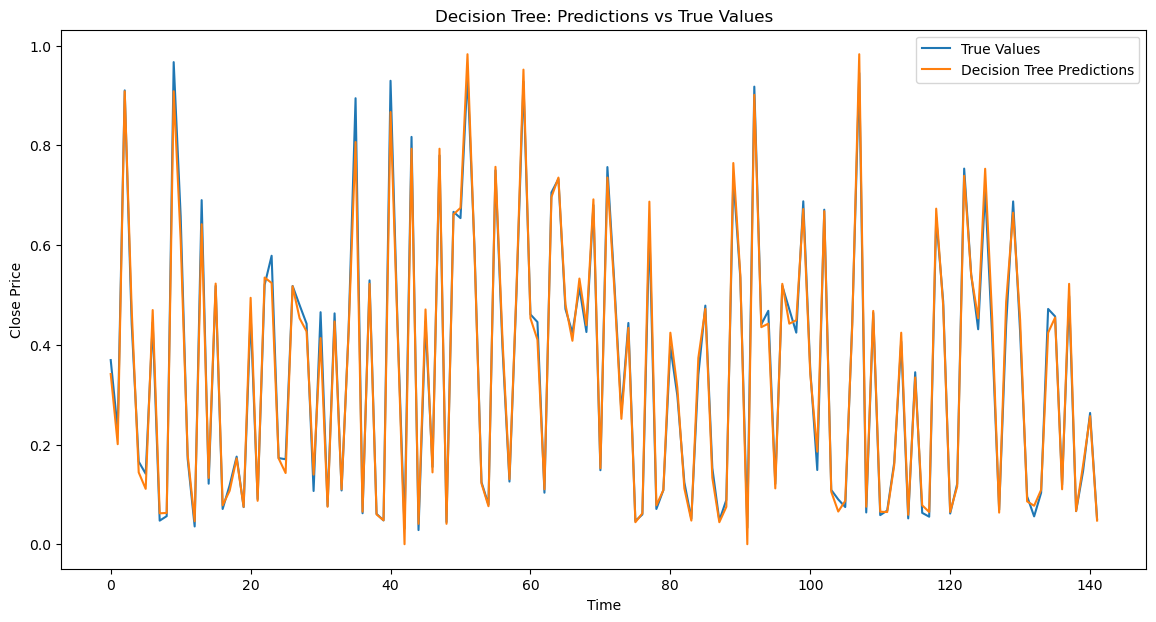

In [103]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [104]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.372541379771774, True Value: 0.36936735858531955
Prediction: 0.18693676132902984, True Value: 0.22892808022867228
Prediction: 0.905585559435195, True Value: 0.9103171506210628
Prediction: 0.44052586484250106, True Value: 0.44134811760521286
Prediction: 0.15658966211922373, True Value: 0.16567167424516172
Prediction: 0.11242773748538927, True Value: 0.14131357678003764
Prediction: 0.44446227085808554, True Value: 0.44491719470389113
Prediction: 0.05884748968668884, True Value: 0.047302912471247294
Prediction: 0.06259615643583588, True Value: 0.056302394052280325
Prediction: 0.9356995413282179, True Value: 0.9670113658323365


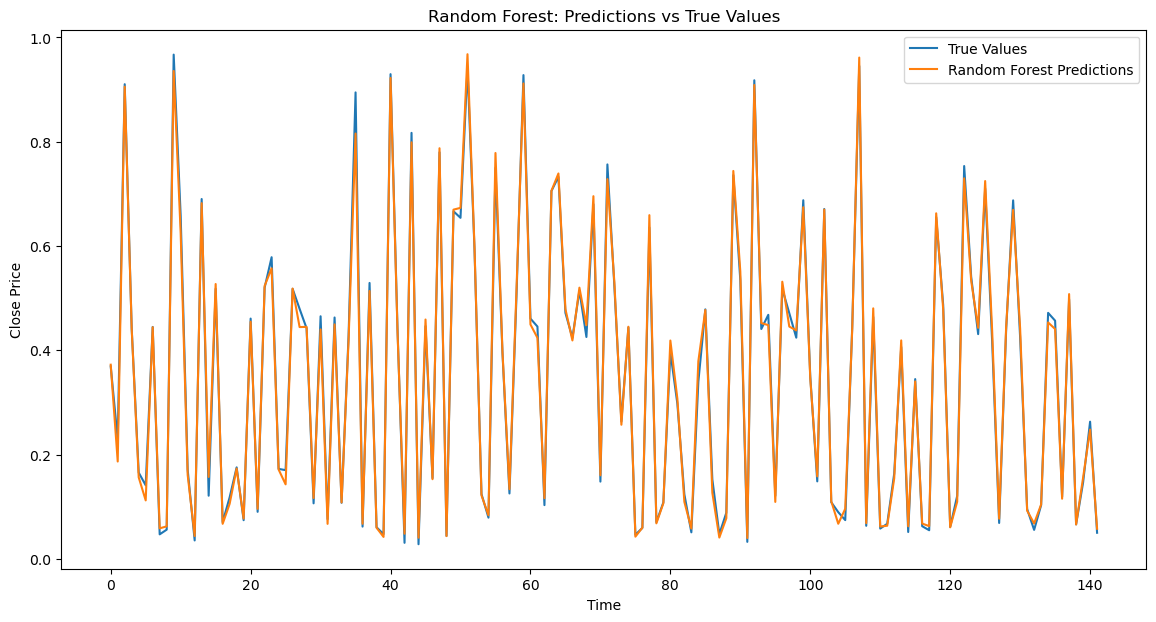

In [105]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

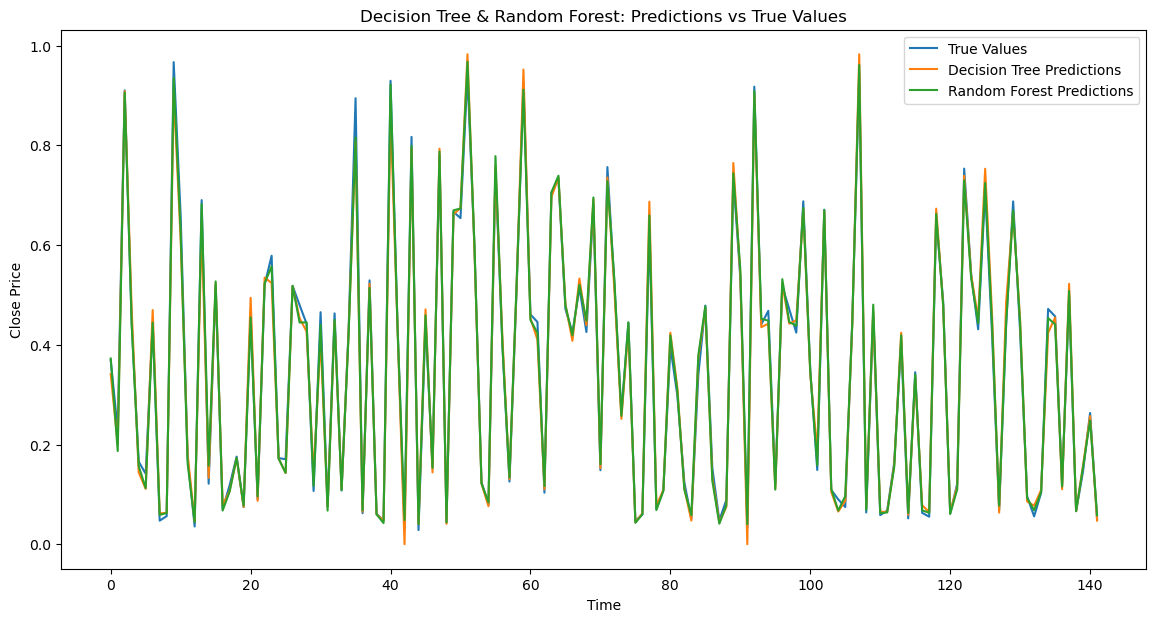

In [106]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()